# Flare Models

These models were produced by [Isaiah Tristan](https://www.itristan.space/).

In [14]:
import sys

import numpy as np

from astropy.table import Table
from astropy import units as u
from astropy.modeling import models

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append('../src')

import arhap

In [10]:
model_fluxes = Table.read("../data_tables/model_fluxes.csv")

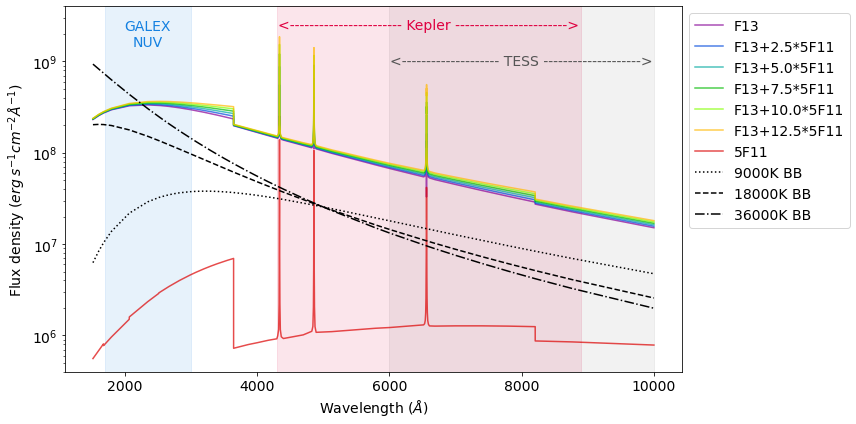

In [52]:
scale = .5

f, ax = plt.subplots(figsize=(12, 6))
ax.tick_params(axis='both', which='major', labelsize=14)

# GALEX
ax.axvspan(1700, 3000, alpha=0.1, color='#1581e1')
ax.text(x=2350, y=2*10**9, s="GALEX\nNUV", va='center', ha="center", color="#1581e1", fontsize=14)

# Kepler
ax.axvspan((430*u.nm).to(u.angstrom).value, (890*u.nm).to(u.angstrom).value, alpha=0.1, color='#df0040')
ax.text(x=6600, y=2.5*10**9, s="<----------------------- Kepler ----------------------->", 
        va='center', ha="center", color="#df0040", fontsize=14)

# TESS
ax.axvspan((600*u.nm).to(u.angstrom).value, (1000*u.nm).to(u.angstrom).value, alpha=0.05, color='black')
ax.text(x=8000, y=10**9, s="<-------------------- TESS -------------------->", va='center', ha="center", color="#555555", fontsize=14)



arhap.set_cycle_by_cmap(ax, cmap='nipy_spectral', length=len(model_fluxes.colnames)-1)

for col in model_fluxes.colnames[1:]:
    ax.plot(model_fluxes["wl_ang"], model_fluxes[col], label=col, alpha=0.7) 
    
# Black body curves
bb_9000 = models.BlackBody(9000*u.K, scale=scale * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
bb_18000 = models.BlackBody(18000*u.K, scale=scale * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
bb_36000 = models.BlackBody(36000*u.K, scale=scale * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
norm_fact = bb_9000(5000*u.AA)/bb_18000(5000*u.AA)
norm_2 =  bb_9000(5000*u.AA)/bb_36000(5000*u.AA)

ax.plot(model_fluxes["wl_ang"], bb_9000(model_fluxes["wl_ang"]*u.AA)*np.pi*u.sr,
        label="9000K BB", color="black", ls=":", alpha=1) 
   

ax.plot(model_fluxes["wl_ang"], bb_18000(model_fluxes["wl_ang"]*u.AA)*np.pi*u.sr*norm_fact,
        label="18000K BB", color="black", ls="--", alpha=1) 

ax.plot(model_fluxes["wl_ang"], bb_36000(model_fluxes["wl_ang"]*u.AA)*np.pi*u.sr*norm_2,
        label="36000K BB", color="black", ls="-.", alpha=1) 

ax.semilogy()  

ax.set_ylim(400000, 4000000000)
ax.set_xlabel("Wavelength ($\AA$)", fontsize=14)
ax.set_ylabel("Flux density ($erg\; s^{-1} cm^{-2} \AA^{-1}$)", fontsize=14)

ax.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize=14)

plt.tight_layout()

f.savefig("../plots/models.pdf")


plt.show()